# Decision tree model

## Assessing the predictive ability of a decision tree model
Using a training and testing split of the DCD and DBD datasets to fit and assess the predictive ability of a decision tree model

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as mets
%matplotlib inline

In [22]:
#Read in dataset with all rows included
df = pd.read_sas("Data/alldata3.sas7bdat")

#6931 DBD apps
dbd_apps = df[(df["eli_DBD"]==1)&(df["FAMILY_APPROACHED"]==2)]

#6060 DBD apps to match cohort in paper
dbd_apps = dbd_apps[(dbd_apps["eth_grp"]!=5)&(dbd_apps["FORMAL_APR_WHEN"]!=4)&(dbd_apps["donation_mentioned"]!=-1)
                    &(dbd_apps["FAMILY_WITNESS_BSDT"]!=9)&(dbd_apps["GENDER"]!=9)]
     
#9965 DCD apps
dcd_apps = df[(df["eli_DCD"]==1)&(df["FAMILY_APPROACHED"]==2)]

#9405 DCD apps to match cohort in paper
dcd_apps = dcd_apps[(dcd_apps["GENDER"]!=9)&(dcd_apps["cod_neuro"].notna())&(dcd_apps["eth_grp"]!=5)&(dcd_apps["donation_mentioned"]!=-1)&
                    (~dcd_apps["DTC_WD_TRTMENT_PRESENT"].isin([8,9]))]

# Columns used to create DBD model in paper
dbd_cols = ["wish", "FORMAL_APR_WHEN", "donation_mentioned", "app_nature", "eth_grp", "religion_grp", "GENDER", "FAMILY_WITNESS_BSDT", "DTC_PRESENT_BSD_CONV", 
            "acorn_new", "adult","FAMILY_CONSENT"]

dbd_apps[dbd_cols].astype(int)

dbd_model_data = dbd_apps[dbd_cols]
dbd_model_data2 = pd.get_dummies(data=dbd_model_data,columns=dbd_cols[:-1],drop_first=True)

dbd_features = dbd_model_data2.drop("FAMILY_CONSENT",axis=1)
dbd_consents = dbd_model_data2["FAMILY_CONSENT"]

# Columns used to create DCD model in paper
dcd_cols = ["wish", "donation_mentioned", 
            "app_nature", "eth_grp", "religion_grp", "GENDER", "DTC_WD_TRTMENT_PRESENT", 
            "acorn_new", "adult","cod_neuro","FAMILY_CONSENT"]

dcd_apps[dbd_cols].astype(int)

dcd_model_data = dcd_apps[dcd_cols]
dcd_model_data2 = pd.get_dummies(data=dcd_model_data,columns=dcd_cols[:-1],drop_first=True)

dcd_features = dcd_model_data2.drop("FAMILY_CONSENT",axis=1)
dcd_consents = dcd_model_data2["FAMILY_CONSENT"]

# creating a train and testing dataset for DBD and DCD approaches

# 1382 consents, 618 non-consents in test data
DBD_X_train, DBD_X_test, DBD_y_train, DBD_y_test = train_test_split(dbd_features,dbd_consents, test_size=0.33, random_state=10)

# 1865 consents, 1239 non-consents in t
DCD_X_train, DCD_X_test, DCD_y_train, DCD_y_test = train_test_split(dcd_features,dcd_consents, test_size=0.33, random_state=10)

/Users/roddy.jacques/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")
/Users/roddy.jacques/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]


In [4]:
# fitting tree to training data 
tree_model = DecisionTreeClassifier(max_depth=10)

In [5]:
DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)

DBD_preds = DBD_tree.predict(DBD_X_test)

dbd_cm = mets.confusion_matrix(DBD_y_test, DBD_preds)

print("TN  FN\nFP  TP\n")
print(str(int(dbd_cm[0,0])) + "    " + str(int(dbd_cm[0,1])))
print(str(int(dbd_cm[1,0])) + "    " + str(int(dbd_cm[1,1])) + "\n") 

# classification report for DBD model
print(mets.classification_report(DBD_y_test, DBD_preds))

print("Balanced accuracy: " + str(round(mets.balanced_accuracy_score(DBD_y_test, DBD_preds),2)))

print("Accuracy: " + str(round(mets.accuracy_score(DBD_y_test, DBD_preds),2)))

TN  FN
FP  TP

188    430
90    1292

              precision    recall  f1-score   support

         1.0       0.68      0.30      0.42       618
         2.0       0.75      0.93      0.83      1382

    accuracy                           0.74      2000
   macro avg       0.71      0.62      0.63      2000
weighted avg       0.73      0.74      0.70      2000

Balanced accuracy: 0.62
Accuracy: 0.74


In [93]:
# Plot tree
# fig,ax = plt.subplots(1,1,figsize=[100,100])
# plot_tree(DBD_tree,feature_names=dbd_features.columns,class_names=["Non-consent","Consent"])
# plt.show()

In [6]:
DCD_tree = tree_model.fit(DCD_X_train,DCD_y_train)

DCD_preds = DCD_tree.predict(DCD_X_test)

dcd_cm = mets.confusion_matrix(DCD_y_test, DCD_preds)

print("TN  FN\nFP  TP\n")
print(str(int(dcd_cm[0,0])) + "    " + str(int(dcd_cm[0,1])))
print(str(int(dcd_cm[1,0])) + "    " + str(int(dcd_cm[1,1])) + "\n") 

# classification report for DCD model
print(mets.classification_report(DCD_y_test, DCD_preds))

print("Balanced accuracy: " + str(round(mets.balanced_accuracy_score(DCD_y_test, DCD_preds),2)))

print("Accuracy: " + str(round(mets.accuracy_score(DCD_y_test, DCD_preds),2)))

TN  FN
FP  TP

768    471
437    1428

              precision    recall  f1-score   support

         1.0       0.64      0.62      0.63      1239
         2.0       0.75      0.77      0.76      1865

    accuracy                           0.71      3104
   macro avg       0.69      0.69      0.69      3104
weighted avg       0.71      0.71      0.71      3104

Balanced accuracy: 0.69
Accuracy: 0.71


In [96]:
# Plot tree
# fig,ax = plt.subplots(1,1,figsize=[100,100])
# plot_tree(DCD_tree,feature_names=dcd_features.columns,class_names=["Non-consent","Consent"])
# plt.show()

## Tuning decision tree

In [7]:
# Loop through tree depths between 1 and 200 and create lists of recall and balanced accuracy 
depths = np.linspace(start=1,stop=200,num=200)
recall_cons = []
recall_refs = []
bas = []

for d in depths:
    tree_model = DecisionTreeClassifier(max_depth=d,random_state=66)
    DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)
    DBD_preds = DBD_tree.predict(DBD_X_test)
    recall_cons.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=2))
    recall_refs.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=1))
    bas.append(mets.balanced_accuracy_score(DBD_y_test,DBD_preds))  

# prunt max recall for non consent group and average balanced accuracy for depths above 31
print(depths[np.argmax(recall_refs)])
print(np.mean(bas[30:]))

25.0
0.6385333389534421


Text(0.5, 0, 'Maximum tree depth')

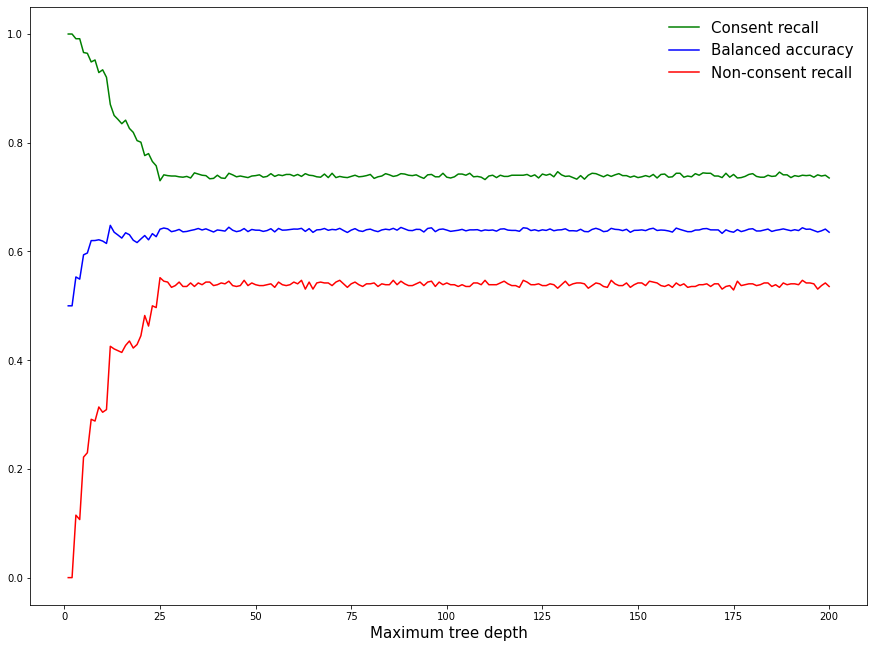

In [111]:
fig, ax = plt.subplots(1,1,figsize=[15,11],facecolor="white")
ax.set_facecolor("white")

ax.plot(depths,recall_cons, 'g-')
ax.plot(depths,bas,'b-')
ax.plot(depths,recall_refs,'r-')

ax.legend(["Consent recall","Balanced accuracy", "Non-consent recall"],loc=1,fontsize=15,frameon=False)

plt.xlabel("Maximum tree depth", fontsize=15)

In [211]:
min_split = np.arange(start=2,stop=200,step=10)
recall_cons = []
recall_refs = []
bas = []

for n in min_split:
    tree_model = DecisionTreeClassifier(max_depth=27,min_samples_split=n,random_state=66)
    DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)
    DBD_preds = DBD_tree.predict(DBD_X_test)
    recall_cons.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=2))
    recall_refs.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=1))
    bas.append(mets.balanced_accuracy_score(DBD_y_test,DBD_preds))
    
print(min_split[np.argmax(bas)])

82


Text(0.5, 0, 'Minimum samples for a split')

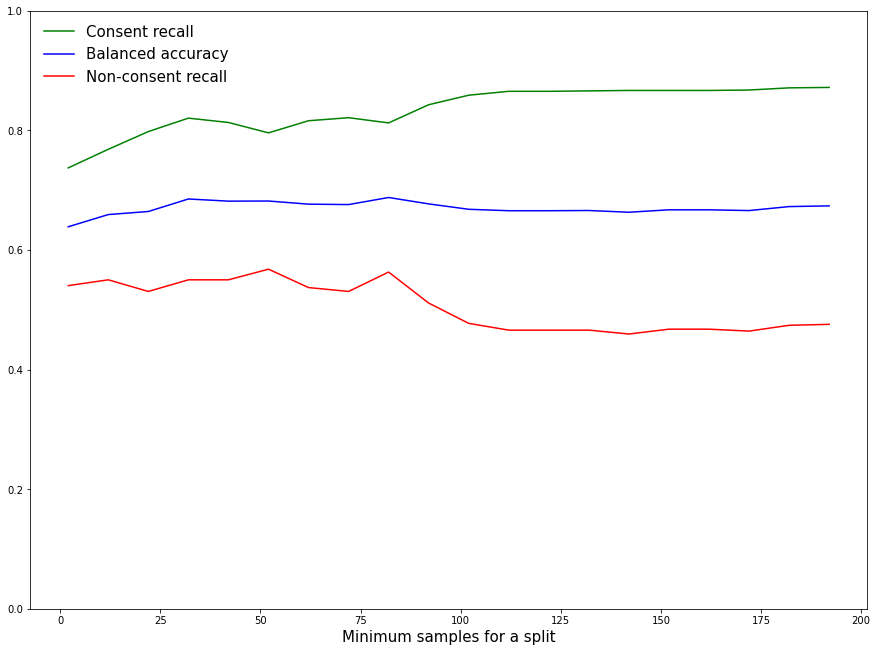

In [212]:
fig, ax = plt.subplots(1,1,figsize=[15,11],facecolor="white")
ax.set_facecolor("white")

ax.plot(min_split,recall_cons, 'g-')
ax.plot(min_split,bas,'b-')
ax.plot(min_split,recall_refs,'r-')
ax.set_ylim(0,1)

ax.legend(["Consent recall","Balanced accuracy", "Non-consent recall"],loc=2,fontsize=15,frameon=False)

plt.xlabel("Minimum samples for a split", fontsize=15)

In [209]:
min_leaf = np.arange(start=1,stop=50,step=5)
recall_cons = []
recall_refs = []
bas = []

for n in min_leaf:
    tree_model = DecisionTreeClassifier(max_depth=27,min_samples_leaf=n,random_state=66)
    DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)
    DBD_preds = DBD_tree.predict(DBD_X_test)
    recall_cons.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=2))
    recall_refs.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=1))
    bas.append(mets.balanced_accuracy_score(DBD_y_test,DBD_preds))
    
print(min_leaf[np.argmax(recall_refs)])

1


Text(0.5, 0, 'Minimum samples for a leaf')

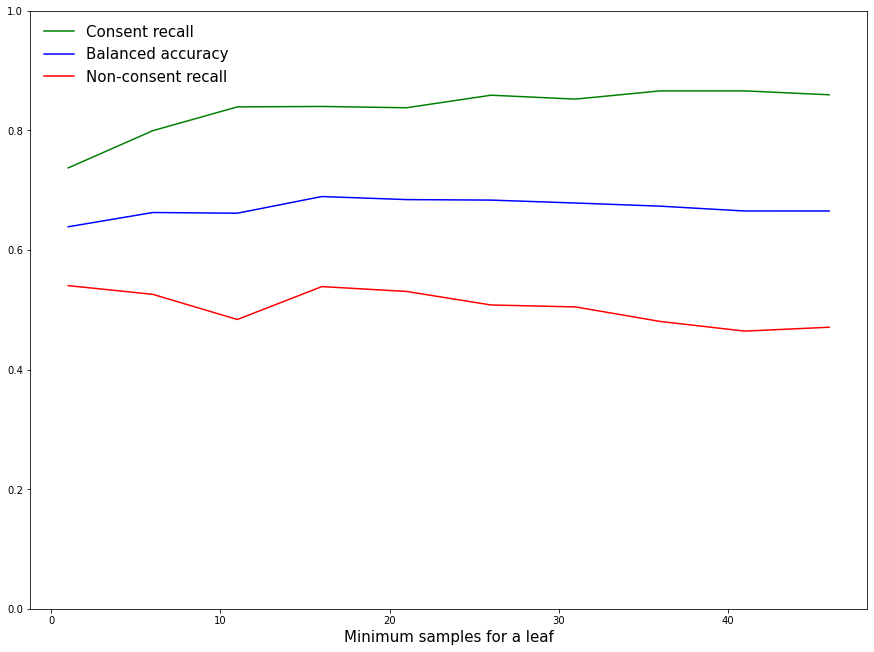

In [210]:
fig, ax = plt.subplots(1,1,figsize=[15,11],facecolor="white")
ax.set_facecolor("white")

ax.plot(min_leaf,recall_cons, 'g-')
ax.plot(min_leaf,bas,'b-')
ax.plot(min_leaf,recall_refs,'r-')
ax.set_ylim(0,1)

ax.legend(["Consent recall","Balanced accuracy", "Non-consent recall"],loc=2,fontsize=15,frameon=False)

plt.xlabel("Minimum samples for a leaf", fontsize=15)

In [153]:
nc_weight = np.arange(start=1,stop=5,step=0.1)
recall_cons = []
recall_refs = []
bas = []

for n in nc_weight:
    weights = {1.0:n,2.0:1}
    tree_model = DecisionTreeClassifier(max_depth=27,min_samples_split=2,class_weight=weights,random_state=66)
    DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)
    DBD_preds = DBD_tree.predict(DBD_X_test)
    recall_cons.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=2))
    recall_refs.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=1))
    bas.append(mets.balanced_accuracy_score(DBD_y_test,DBD_preds))
    
print(nc_weight[np.argmax(bas)])

2.7000000000000015


Text(0.5, 0, 'Weighting to non-consent group')

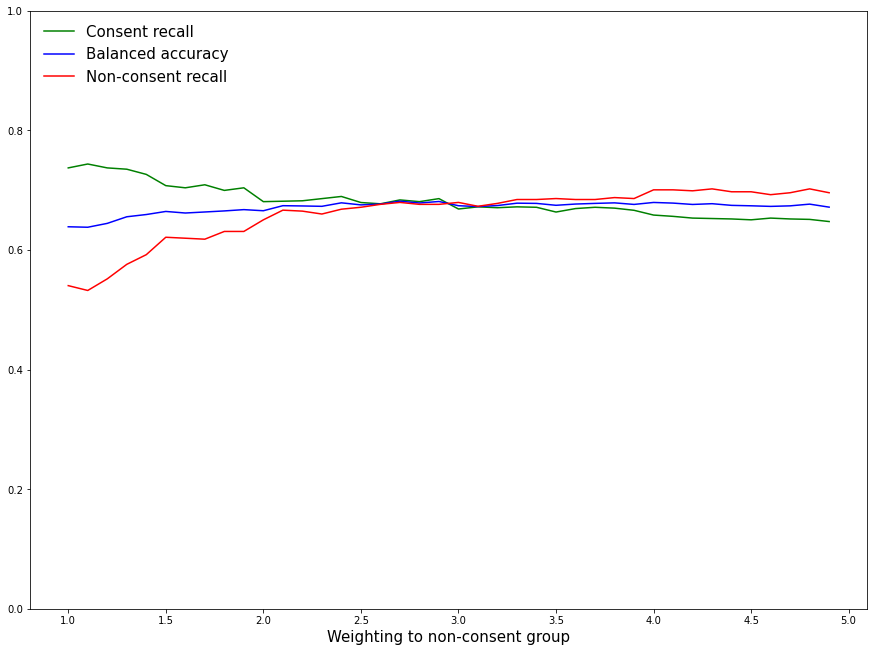

In [151]:
fig, ax = plt.subplots(1,1,figsize=[15,11],facecolor="white")
ax.set_facecolor("white")

ax.plot(nc_weight,recall_cons, 'g-')
ax.plot(nc_weight,bas,'b-')
ax.plot(nc_weight,recall_refs,'r-')
ax.set_ylim(0,1)

ax.legend(["Consent recall","Balanced accuracy", "Non-consent recall"],loc=2,fontsize=15,frameon=False)

plt.xlabel("Weighting to non-consent group", fontsize=15)

In [194]:
depths = np.arange(start=1,stop=100,step=1)
ws = np.arange(1.5,3,step=0.25)
w_recall_cons = []
w_recall_refs = []
w_bas = []

for w in ws:
    recall_cons = []
    recall_refs = []
    bas = []
    for d in depths:
        weights = {1.0:w,2.0:1}
        tree_model = DecisionTreeClassifier(max_depth=d,class_weight=weights,random_state=66)
        DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)
        DBD_preds = DBD_tree.predict(DBD_X_test)
        recall_cons.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=2))
        recall_refs.append(mets.recall_score(DBD_y_test,DBD_preds,pos_label=1))
        bas.append(mets.balanced_accuracy_score(DBD_y_test,DBD_preds)) 
    w_recall_cons.append(recall_cons)
    w_recall_refs.append(recall_refs)
    w_bas.append(bas)  



1.5 0.6364617044228694 0.7046368167931121 0.6657709618347785 9
1.75 0.6480991141185315 0.6948939467029188 0.6643237838318837 8
2.0 0.6812951521689388 0.6707377684222838 0.6686711721205137 7
2.25 0.6938642084273151 0.666915171980295 0.6731637465518291 7
2.5 0.7057140989179821 0.657683930476984 0.6747619649773559 7
2.75 0.7091301363146022 0.6557982136853338 0.6759328209667522 7


Text(0.5, 0, 'Maximum tree depth')

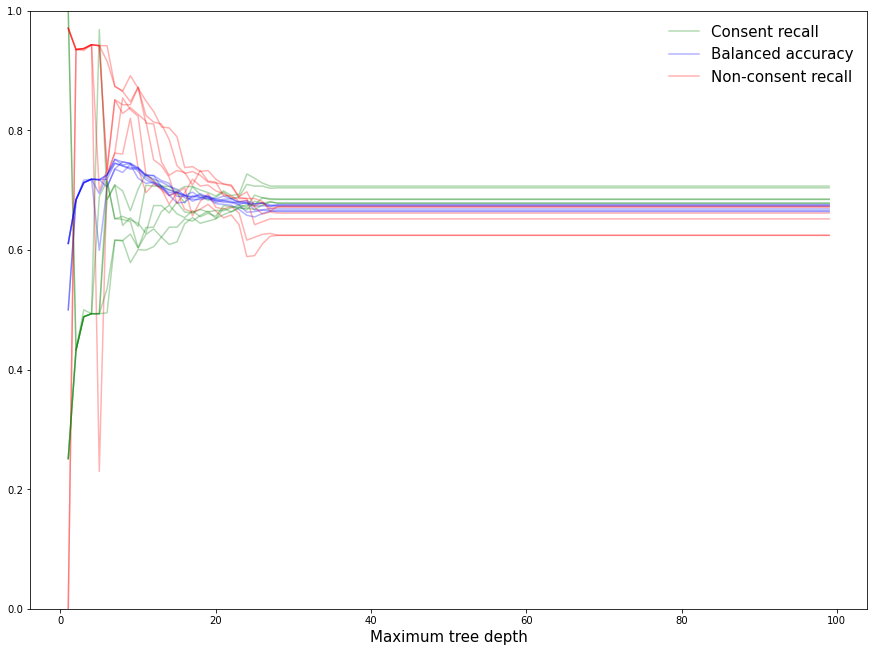

In [195]:
fig, ax = plt.subplots(1,1,figsize=[15,11],facecolor="white")
ax.set_facecolor("white")

for i in range(ws.shape[0]):
    print(str(ws[i])+" "+str(np.mean(w_recall_refs[i]))+" "+str(np.mean(w_recall_cons[i]))+" "+str(np.mean(w_bas[i][30:]))+" "+str(depths[np.argmax(w_bas[i])]))
    ax.plot(depths,w_recall_cons[i], 'g-',alpha=0.3)
    ax.plot(depths,w_bas[i],'b-',alpha=0.3)
    ax.plot(depths,w_recall_refs[i],'r-',alpha=0.3)
    ax.set_ylim(0,1)

ax.legend(["Consent recall","Balanced accuracy", "Non-consent recall"],loc=1,fontsize=15,frameon=False)

plt.xlabel("Maximum tree depth", fontsize=15)

In [9]:
tree_model = DecisionTreeClassifier(max_depth=27,min_samples_split=82,random_state=66)

In [10]:
DBD_tree = tree_model.fit(DBD_X_train,DBD_y_train)

DBD_preds = DBD_tree.predict(DBD_X_test)

dbd_cm = mets.confusion_matrix(DBD_y_test, DBD_preds)

print("TN  FN\nFP  TP\n")
print(str(int(dbd_cm[0,0])) + "    " + str(int(dbd_cm[0,1])))
print(str(int(dbd_cm[1,0])) + "    " + str(int(dbd_cm[1,1])) + "\n") 

# classification report for DBD model
print(mets.classification_report(DBD_y_test, DBD_preds))

print("Balanced accuracy: " + str(round(mets.balanced_accuracy_score(DBD_y_test, DBD_preds),2)))

print("Accuracy: " + str(round(mets.accuracy_score(DBD_y_test, DBD_preds),2)))

TN  FN
FP  TP

348    270
259    1123

              precision    recall  f1-score   support

         1.0       0.57      0.56      0.57       618
         2.0       0.81      0.81      0.81      1382

    accuracy                           0.74      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.73      0.74      0.73      2000

Balanced accuracy: 0.69
Accuracy: 0.74


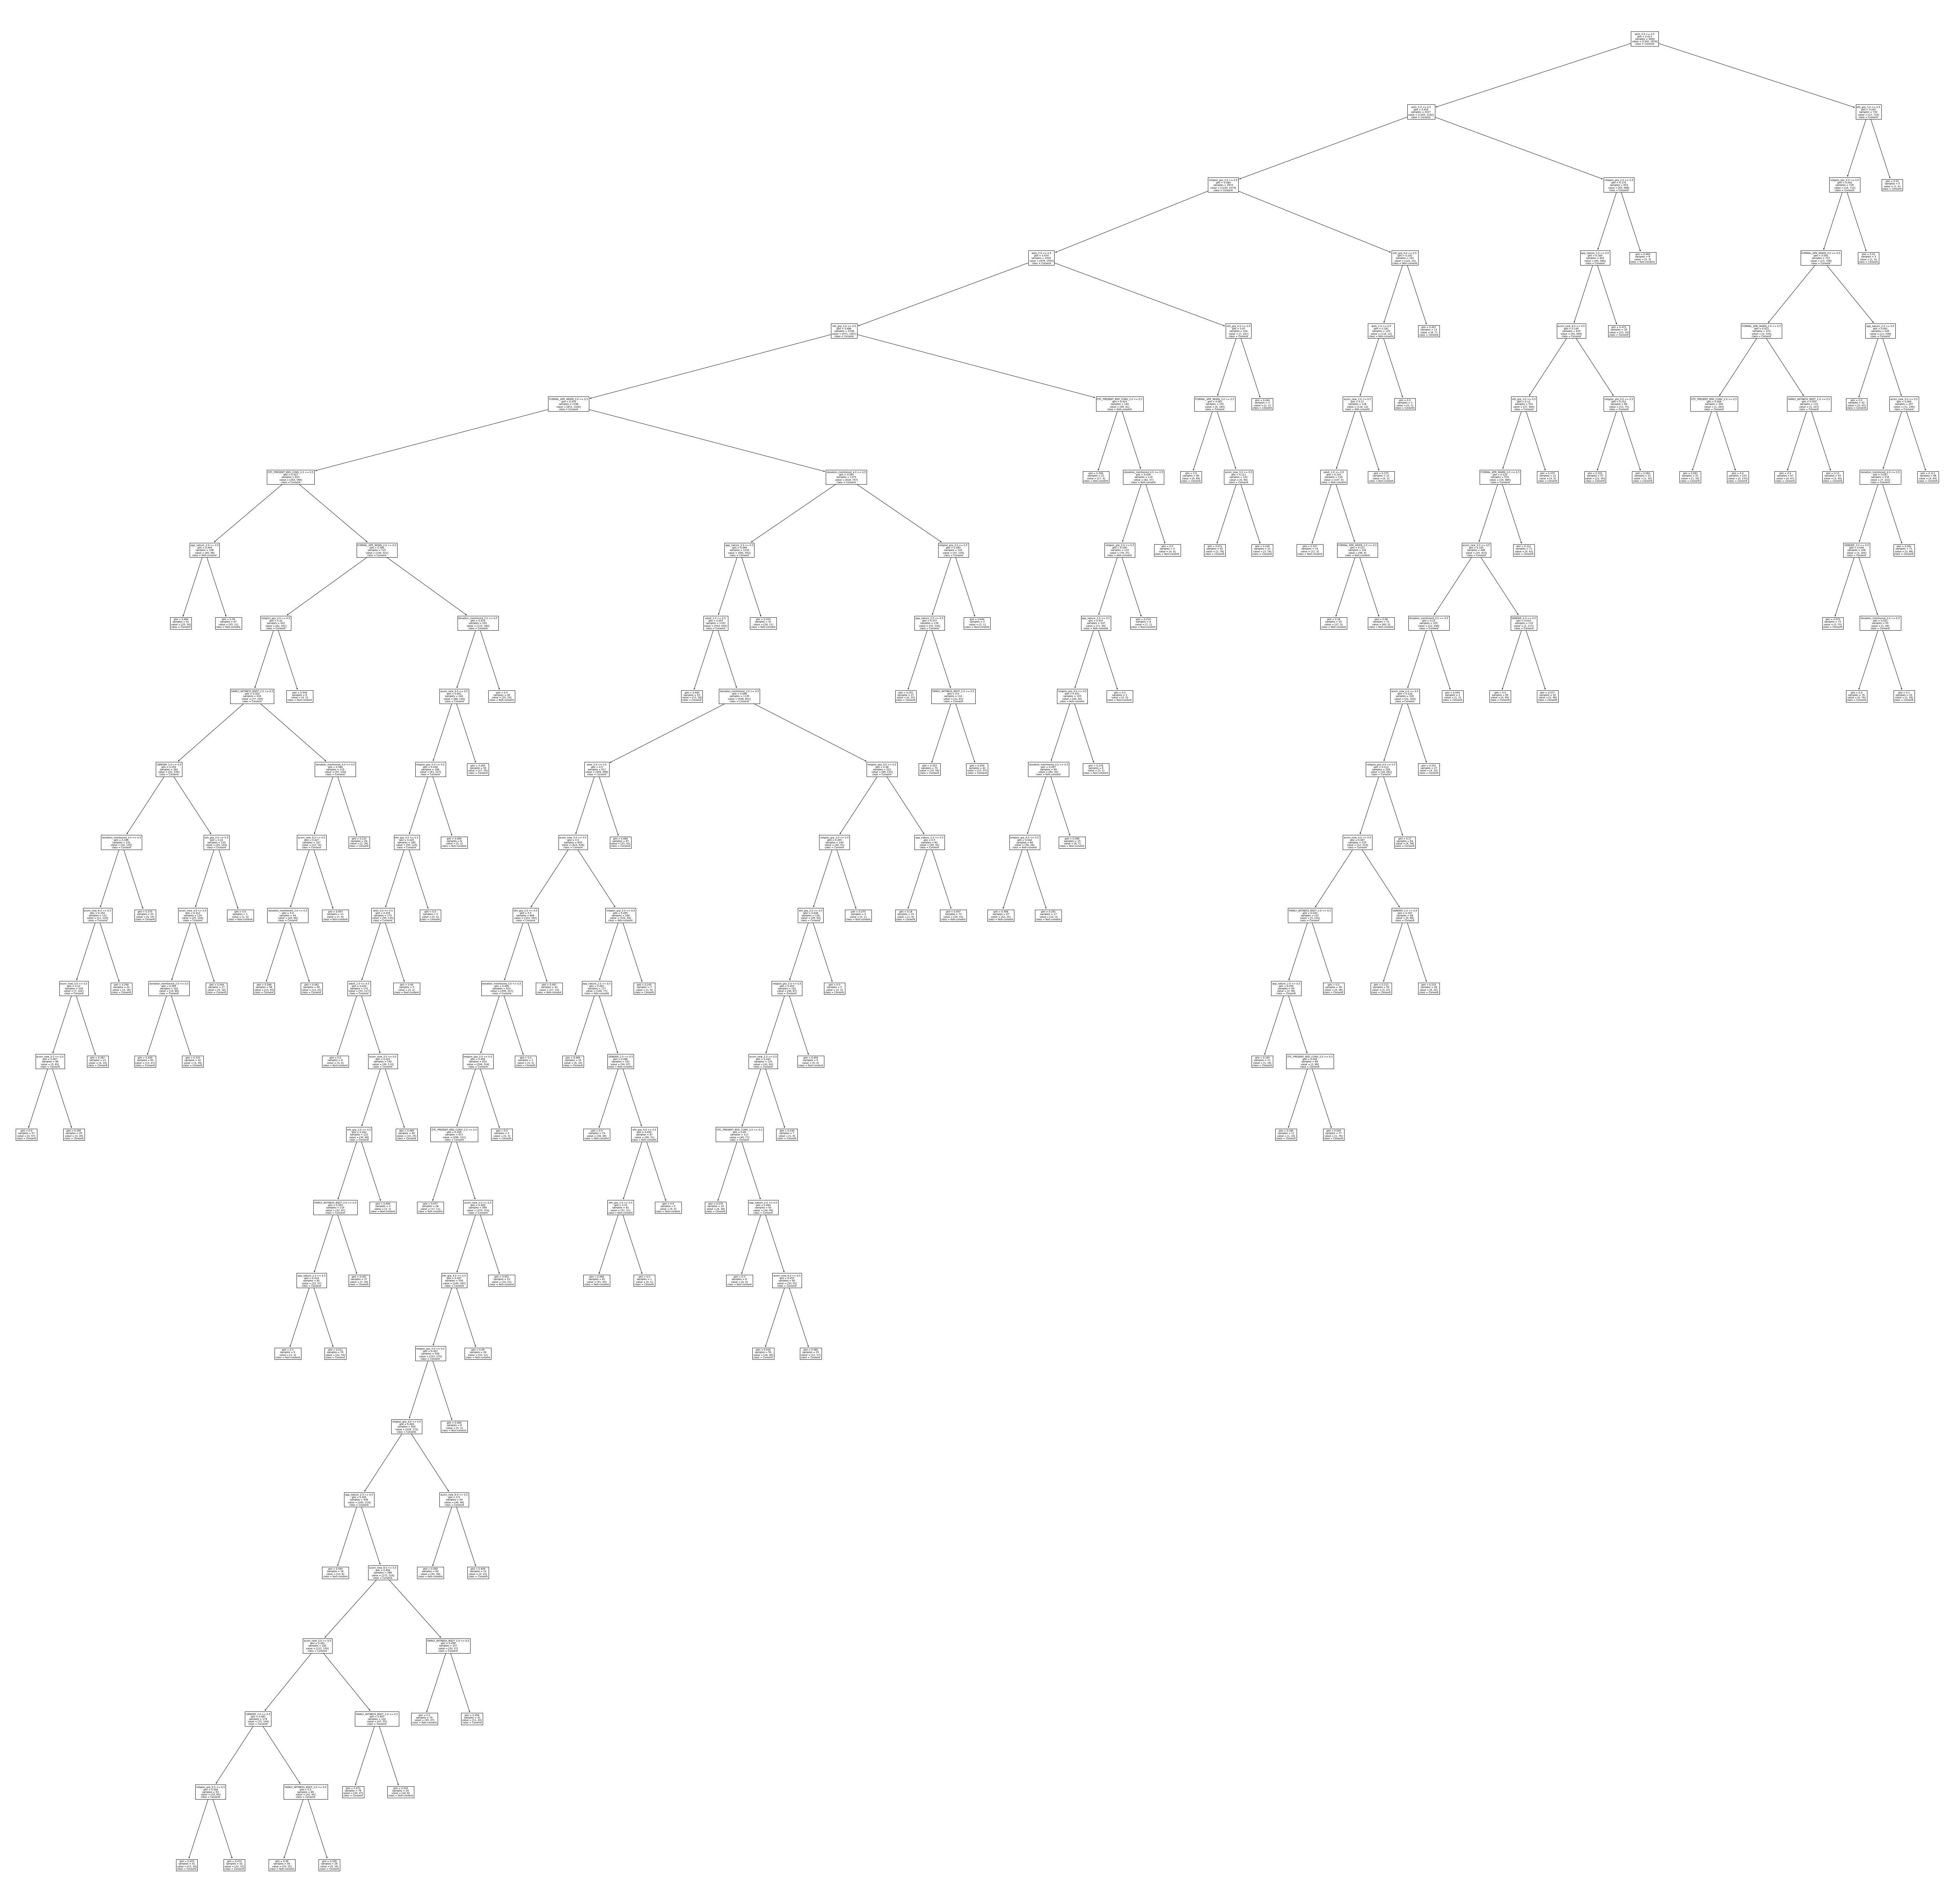

In [11]:
# Plot tree
fig,ax = plt.subplots(1,1,figsize=[100,100])
plot_tree(DBD_tree,feature_names=dbd_features.columns,class_names=["Non-consent","Consent"])
plt.show()

## Cross validated grid search hyperparameter tuning

In [37]:
tree_model = DecisionTreeClassifier(random_state=66)

weights = []
for w in np.arange(1,4,step=0.5):
    w_dic = {1.0:w,2.0:1}
    weights.append(w_dic)

params = {'max_depth':np.arange(10,35,step=1),'min_samples_split':np.arange(75,250,step=25),'class_weight':weights}

gs_tree_model = GridSearchCV(tree_model, param_grid=params, scoring="balanced_accuracy")

gs_tree_model.fit(DBD_X_train,DBD_y_train)

gs_tree_model.score(DBD_X_train,DBD_y_train)

print(gs_tree_model.best_params_)

print(gs_tree_model.best_score_)

{'class_weight': {1.0: 2.0, 2.0: 1}, 'max_depth': 17, 'min_samples_split': 200}
0.7445366669361451


In [39]:
DBD_preds = gs_tree_model.predict(DBD_X_test)

dbd_cm = mets.confusion_matrix(DBD_y_test, DBD_preds)

print("TN  FN\nFP  TP\n")
print(str(int(dbd_cm[0,0])) + "    " + str(int(dbd_cm[0,1])))
print(str(int(dbd_cm[1,0])) + "    " + str(int(dbd_cm[1,1])) + "\n") 

# classification report for DBD model
print(mets.classification_report(DBD_y_test, DBD_preds))

print("Balanced accuracy: " + str(round(mets.balanced_accuracy_score(DBD_y_test, DBD_preds),2)))

print("Accuracy: " + str(round(mets.accuracy_score(DBD_y_test, DBD_preds),2)))

TN  FN
FP  TP

516    102
468    914

              precision    recall  f1-score   support

         1.0       0.52      0.83      0.64       618
         2.0       0.90      0.66      0.76      1382

    accuracy                           0.71      2000
   macro avg       0.71      0.75      0.70      2000
weighted avg       0.78      0.71      0.73      2000

Balanced accuracy: 0.75
Accuracy: 0.72
